<a href="https://colab.research.google.com/github/singhankittttt/Admission-Prediction-using-Machine-Learning/blob/web-developer/Admission_Prediction_in_College.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [2]:
df1=pd.read_csv("College.csv")
df1.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,IIT Bombay
1,2015,95,92,2,100,IIT delhi
2,2018,91,80,6,260,IIT kanpur
3,2017,88,85,2,222,IIT kharagpur
4,2016,89,84,1,600,IIT guwahati


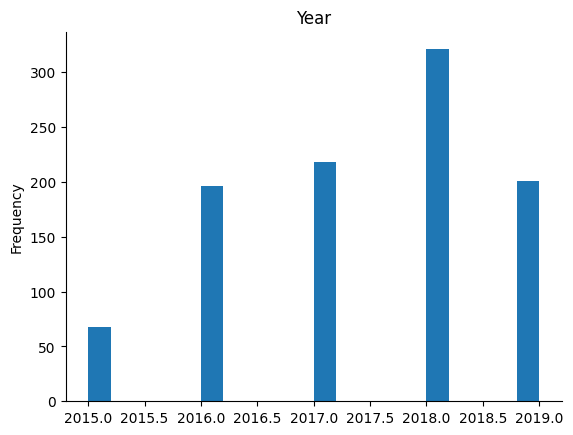

In [8]:
# @title Year

from matplotlib import pyplot as plt
df1['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df=df1.copy()
len(df)

1004

In [9]:
colg=np.unique(df['College'])
print(colg)
print(len(df))
print(len(colg))

['Ahemedabad IT' 'BIT Mesra' 'BITS pilani' 'BMS college of ENGG'
 'DTU delhi' 'HBUT kanpur' 'IIEST shibpur' 'IIIT hydrabad' 'IIT Bombay'
 'IIT bhilai' 'IIT delhi' 'IIT goa' 'IIT guwahati' 'IIT hydrabad'
 'IIT indore' 'IIT jammu' 'IIT jodhpur' 'IIT kanpur' 'IIT kharagpur'
 'IIT mandi' 'IIT palakkad' 'IIT ropar' 'IIT tirupati'
 'Jadavpur University' 'Jadavpur Univversity' 'KLEF hydrabad'
 'MNIT jaipur' 'MNNIT allahabad' 'MSIT' 'Manipal IT' 'NIT trichy'
 'NIT warangal' 'NMIMS' 'Netaji Subhas IT' 'S O A  university'
 'SRMIST chennai' 'SSN college of ENGG' 'University college of ENGG'
 'VIT vellore']
1004
39


In [10]:
code=[]
for i in range(len(colg)):
    code.append(i+1)

In [11]:
df['College']=df['College'].replace(colg,code)
bak_college=np.array(df['College'])
df.head()

<ipython-input-11-09bd26fac15f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['College']=df['College'].replace(colg,code)


,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,9
1,2015,95,92,2,100,11
2,2018,91,80,6,260,18
3,2017,88,85,2,222,19
4,2016,89,84,1,600,13


In [12]:
X = df.drop(columns=["Year","College"])
y=df['College']

<ipython-input-13-1b5b0e2825da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['10th Marks'])


<Axes: xlabel='10th Marks', ylabel='Density'>

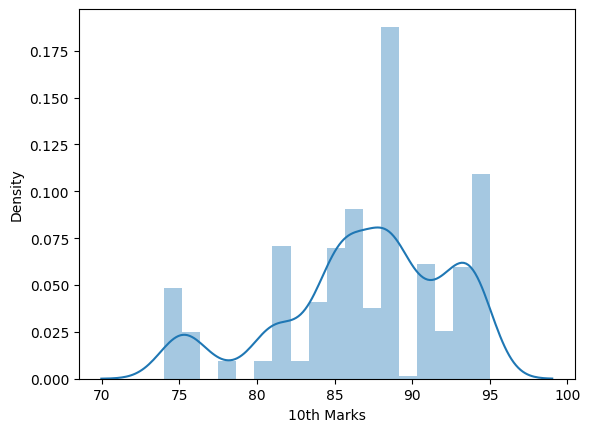

In [13]:
sns.distplot(df['10th Marks'])

<ipython-input-14-3746151c55ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['12th Marks'])


<Axes: xlabel='12th Marks', ylabel='Density'>

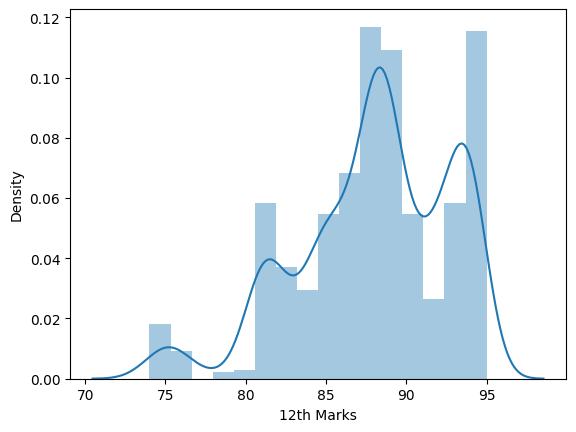

In [14]:
sns.distplot(df['12th Marks'])

<ipython-input-15-487bae7013e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['12th Division'])


<Axes: xlabel='12th Division', ylabel='Density'>

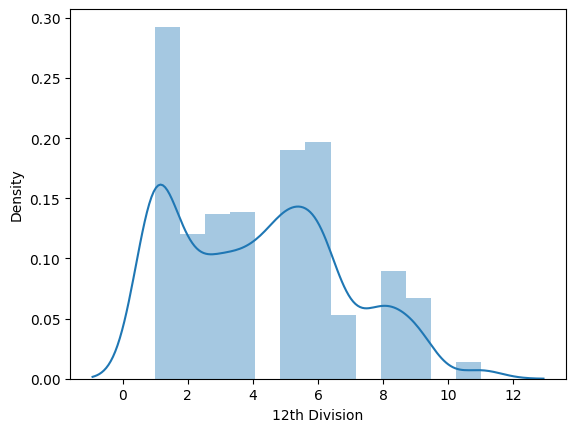

In [15]:
sns.distplot(df['12th Division'])

<ipython-input-16-ab5cec2b9d82>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AIEEE Rank'])


<Axes: xlabel='AIEEE Rank', ylabel='Density'>

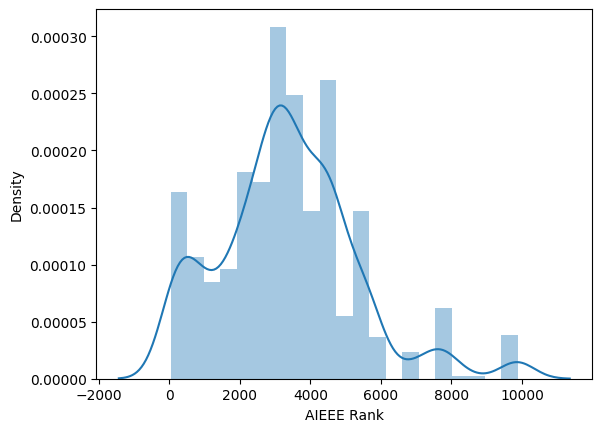

In [16]:
sns.distplot(df['AIEEE Rank'])

In [17]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.05, random_state=22)
clfxg = XGBClassifier(objective="multi:softmax",n_estimators=50,learning_rate=0.0001)
clfxg.fit(X_train, y_train)
predxg=clfxg.predict(X_test)
scrxg=clfxg.score(X_test, y_test)
scrxg=eval("%0.2f"%scrxg)*100
print("Algorithm Score: ",scrxg,"%")

Algorithm Score:  75.0 %


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=36)
clfdt = DecisionTreeClassifier()
clfdt.fit(X_train,y_train)
preddt=clfdt.predict(X_test)
scrdt=clfdt.score(X_test,y_test)
scrdt=eval("%0.2f"%scrdt)*100
print("Algorithm Score: ",scrdt,"%")

Algorithm Score:  96.0 %


In [19]:
pd.crosstab(y_test, predxg, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,6,9,11,12,13,...,26,27,29,32,33,34,36,37,38,All
True,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
12,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,3


In [20]:
df.head(2)

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,9
1,2015,95,92,2,100,11


In [21]:
col=df.columns.tolist()[1:-1]
print(col)

['10th Marks', '12th Marks', '12th Division', 'AIEEE Rank']


In [22]:
usrip=[]
for i in col:
    print("==================================================")
    usrip.append(eval(input(i+": ")))

10th Marks: 90
12th Marks: 89
12th Division: 3
AIEEE Rank: 98


In [23]:
userpreddt=clfdt.predict([usrip])
print("You may have change to get entrance in: ",colg[code.index(userpreddt[0])])

You may have change to get entrance in:  IIT Bombay


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
dct={col[i]:usrip[i]
    for i in range(len(col))}
print(dct)

{'10th Marks': 90, '12th Marks': 89, '12th Division': 3, 'AIEEE Rank': 98}


In [30]:
uip=pd.DataFrame(dct,index=[len(X_test)])
uip.head()

,10th Marks,12th Marks,12th Division,AIEEE Rank
51,90,89,3,98


In [31]:
userpredxg=clfxg.predict(uip)
print("You may have change to get entrance in: ",colg[code.index(userpredxg[0])])

You may have change to get entrance in:  IIIT hydrabad


In [32]:
df1.head(2)

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College,College Code
0,2019,90,89,3,98,IIT Bombay,9
1,2015,95,92,2,100,IIT delhi,11


In [33]:
df1['College Code']=bak_college
df1.head(2)


,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College,College Code
0,2019,90,89,3,98,IIT Bombay,9
1,2015,95,92,2,100,IIT delhi,11


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           1004 non-null   int64
 1   10th Marks     1004 non-null   int64
 2   12th Marks     1004 non-null   int64
 3   12th Division  1004 non-null   int64
 4   AIEEE Rank     1004 non-null   int64
 5   College        1004 non-null   int64
dtypes: int64(6)
memory usage: 47.2 KB


In [35]:
df.shape

(1004, 6)

In [36]:
df.describe()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,2017.389442,87.000996,87.935259,4.216135,3348.584661,20.301793
std,1.198507,5.351549,4.704084,2.551972,1963.073509,11.757077
min,2015.000000,74.000000,74.000000,1.000000,45.000000,1.000000
25%,2016.000000,85.000000,85.000000,2.000000,2135.000000,10.000000
50%,2018.000000,88.000000,88.000000,4.000000,3215.000000,20.000000
75%,2018.000000,91.000000,92.000000,6.000000,4523.000000,31.000000
max,2019.000000,95.000000,95.000000,11.000000,9878.000000,39.000000


Percentage of students with 89 marks: 12.55%


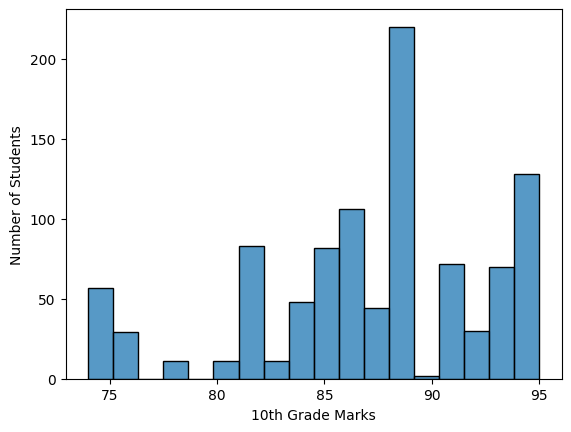

Percentage of students with 94 marks: 11.06%
Percentage of students with 86 marks: 10.56%
Percentage of students with 88 marks: 9.36%
Percentage of students with 85 marks: 8.17%
Percentage of students with 91 marks: 7.17%
Percentage of students with 93 marks: 6.97%
Percentage of students with 81 marks: 6.08%
Percentage of students with 75 marks: 4.78%
Percentage of students with 84 marks: 4.78%
Percentage of students with 87 marks: 4.38%
Percentage of students with 92 marks: 2.99%
Percentage of students with 76 marks: 2.89%
Percentage of students with 82 marks: 2.19%
Percentage of students with 95 marks: 1.69%
Percentage of students with 78 marks: 1.10%
Percentage of students with 83 marks: 1.10%
Percentage of students with 80 marks: 1.10%
Percentage of students with 74 marks: 0.90%
Percentage of students with 90 marks: 0.20%


In [37]:
sns.histplot(df['10th Marks'], kde=False)
plt.xlabel('10th Grade Marks')
plt.ylabel('Number of Students')
marks_counts = df['10th Marks'].value_counts(normalize=True) * 100
for mark, percentage in marks_counts.items():
    print(f"Percentage of students with {mark} marks: {percentage:.2f}%")

    plt.show()